<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part3_logesticregression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with pd.HDFStore('/content/drive/MyDrive/1000/part2_result',  mode='r') as newstore:
    result = newstore.select('result')

In [4]:
#final data
print(result)

             0         1         2  ...         8         9  label
0    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
1    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
2    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
3    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
4    -1.680599 -3.061217 -0.040984  ...  0.006186  0.002988      1
...        ...       ...       ...  ...       ...       ...    ...
1315 -1.680599 -3.061217 -0.040984  ... -0.035323 -0.015205      0
1316 -1.680599 -3.061217 -0.040984  ... -0.012077 -0.016767      0
1317 -1.680599 -3.061217 -0.040984  ... -0.011761 -0.013474      0
1318 -1.680599 -3.061217 -0.040984  ...  0.004503  0.113459      0
1319 -1.680599 -3.061217 -0.040984  ... -0.022880  0.001418      0

[1320 rows x 71 columns]


# **logestic** **regression**

In [5]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [6]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

In [7]:
#train the data

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [8]:
#score of data by prediction at once

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.996969696969697


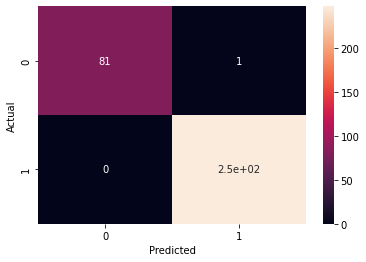

In [9]:
#plotting confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [10]:
#Accuracy by prediction in once

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))

Accuracy:  0.996969696969697


In [11]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 248
False Positives: 1
True Negatives: 81
False Negatives: 0


In [17]:
#cross_validation and accracy

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True)#, random_state=42
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=cv,n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.992 (0.008)


In [13]:
#recall

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict


cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores_recall = cross_val_score(logisticRegr,X, y, scoring='recall', cv=cv,n_jobs=-1)

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.764 (0.396)


In [14]:
#precision

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10)#, shuffle=True, random_state=42
scores_precision = cross_val_score(logisticRegr, X, y, scoring='precision', cv=cv,n_jobs=-1)

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.788 (0.394)


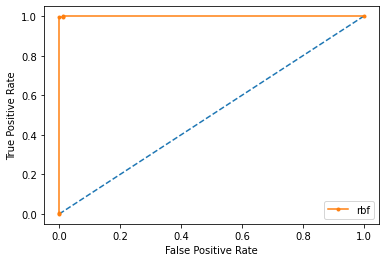


 Logistic ROC AUC 1.000


In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)
yhat = logisticRegr.predict_proba(x_test)
pos_probs = yhat[:, 1]
pyplot.plot([0, 1], [0, 1], linestyle='--')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='rbf')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
roc_auc = roc_auc_score(y_test, yhat[:, 1])
print('\n','Logistic ROC AUC %.3f' % roc_auc)

In [16]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 
#data = load_breast_cancer(as_frame = True)
#df = result.frame
#X = result.iloc[:,:-1]
#y = result.iloc[:,-1]
 
#Implementing cross validation
 
#X = X.sample(frac = 1)
#y= y.sample(frac = 1)
kf = KFold(n_splits=10)#, random_state=None
model = LogisticRegression(max_iter=1000000)#(solver= 'liblinear')
 
acc_score = list()
res_tpr = list()
res_fpr = list()
for train_index , test_index in kf.split(X):
    #X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    #y_train , y_test = y[train_index] , y[test_index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_values, labels=[0, 1]).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
    tpr=(np.divide(tp,(tp+fn)))
    fpr=(np.divide(fp,(fp+tn)))
    if tp==0:
      tpr=0
    if fp==0:
      fpr=0

    print('tpr=%.4f fpr=%.3f' % ( mean(tpr), mean(fpr)))
    print('x')
    res_tpr.append(mean(tpr))
    res_fpr.append(mean(fpr))
    print('---------------------')

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = np.sum(acc_score)/10
total_tpr=np.sum(res_tpr)/10
total_fpr=np.sum(res_fpr)/10
print('\n\n',' total_tpr=%.4f total_fpr=%.3f' % (total_tpr,total_fpr))
#print('\n\n','accuracy of each fold - {}'.format(acc_score))
print('\n\n','Avg accuracy : {}'.format(avg_acc_score))

True Positives: 284
False Positives: 4
True Negatives: 108
False Negatives: 0
tpr=1.0000 fpr=0.036
x
---------------------
True Positives: 305
False Positives: 4
True Negatives: 87
False Negatives: 0
tpr=1.0000 fpr=0.044
x
---------------------
True Positives: 285
False Positives: 4
True Negatives: 107
False Negatives: 0
tpr=1.0000 fpr=0.036
x
---------------------
True Positives: 295
False Positives: 5
True Negatives: 95
False Negatives: 1
tpr=0.9966 fpr=0.050
x
---------------------
True Positives: 294
False Positives: 6
True Negatives: 96
False Negatives: 0
tpr=1.0000 fpr=0.059
x
---------------------
True Positives: 295
False Positives: 7
True Negatives: 94
False Negatives: 0
tpr=1.0000 fpr=0.069
x
---------------------
True Positives: 289
False Positives: 4
True Negatives: 103
False Negatives: 0
tpr=1.0000 fpr=0.037
x
---------------------
True Positives: 300
False Positives: 2
True Negatives: 93
False Negatives: 1
tpr=0.9967 fpr=0.021
x
---------------------
True Positives: 298
F